<h1><center>GPGN328: Physics of the Earth 1 - Assignment 5</center></h1>

<h2><center>Due: 11.59pm on Tuesday, November 11</center></h2>


<h3><center>Your name: </center></h3>
<h3><center>Student #: </center></h3>

### Instructions

<ul>
<li> The Assignment 5 problem set below consists of <b>four</b> questions on materials discussed in course Modules 7 and 8. 
<li> <b>You are required to answer all questions.</b>
<li> Please provide complete answers that clearly show your calculations steps and ensure that you use correct units.
<li> At the end of each full question (not each subquestion!) include a short statement outlining the importance or significance of your result.
<li> It is expected (and encouraged) that you will work on this assignment in small groups; however, <b>please ensure that your write up is your own</b>. 
</ul>

### Questions (Module 7)

<b>Q7-1: Interface Conditions</b>. At the interface between two layers with electrical resistivities $\rho_1$ and $\rho_2$ as in the figure below, the electrical boundary conditions are: (1) the component of current density $j_z$ *normal* to the interface is continuous; and (2) the component of electric field  $e_x$ *tangential* to the interface is continuous. A current flow-line makes angles $\theta_1$ and $\theta_2$ before and after refraction, respectively. Derive the electrical "law of refraction" given by

$$\frac{\tan \theta_1}{\tan \theta_2} = \frac{\rho_2}{\rho_1} $$

<figure>
<img src="./Electrical_Refraction.jpg" width="20%" >
</figure>

**Figure 1**. Illustration the interface discussed in this problem, where J and E shown here are the current density ${\bf j}$ and electric field ${\bf e}$ from the Module 7 course notes.

---

<b>Q7-2: Effective resistivity.</b> What is the **effective resistivity** of a slab of thickness $L$ composed of two half-slabs each of thickness $L/2$ and resistivities $2\rho$ and $\rho/2$, respectively, as in the diagram below?

---

<figure>
<img src="./Half_Space.jpg" width="15%" >
</figure>

**Figure 2**. Illustration of the problem discussed in Q7-2.

### Questions (Module 8)

<b>Q8-1: Modified Schlumberger Array</b>. Equations 13 and 14 of the Module 8.3 notes discuss the generalized arrangement for four electrodes; however, we did not discuss specific electrode geometries. In the Schlumberger resistivity method the separation of the current electrodes $L$ is much larger than the separation $a$ of the voltage electrodes. Suppose that the mid-point of the voltage pair is displaced by a distance $x$ from the mid-point of the current electrode pair (see sketch below). Show that, when assuming $(L – 2x) >> a$, the apparent resistivity $\rho_a$ is given by

$$\rho_a = \frac{\pi}{4}\frac{\Delta\phi}{I} \frac{\left(L^2-4x^2\right)^2}{a\left(L^2+4x^2\right)} $$

where $I$ is current and $\Delta\phi$ is the potential difference (also commonly given by $V$).

<figure>
<img src="./Schlumberger.png" width="50%" >
</figure>

**Figure 3.** Sketch of the electrode geometry used in the Schlumberger resistivity method.

---

**Q8-2: Downhole electrode array**. We start by plotting the measured voltage for a four-electrode configuration when the positions of three electrodes are fixed, and the position of the fourth electrode is allowed to vary along a profile at the surface of the Earth. We will see that this apparently simple task may already lead to numerical problems.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

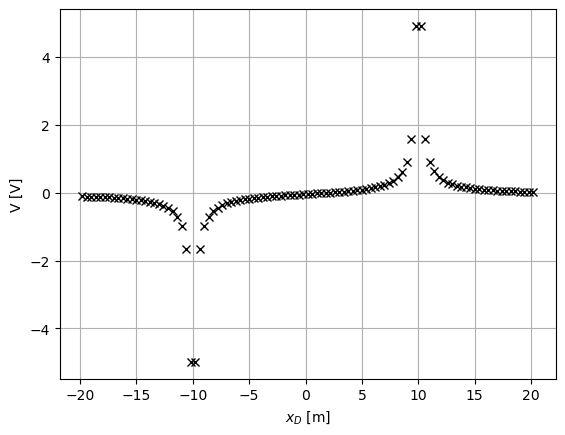

In [2]:
# X-positions of the current electrodes [m]
xA=-10.0
xB=10.0

# X-position of detection electrode C [m]
xC=2.0

# X-position of detection electrode D is variable [m]
xD=np.linspace(-20.0,20.0,101)+0.2

# Measured voltage (assuming rho*I/(2pi)=1)
V=(1.0/np.abs(xA-xC)-1.0/np.abs(xC-xB))-(1.0/np.abs(xA-xD)-1.0/np.abs(xD-xB))

# Plot
plt.plot(xD,V,'kx')
plt.xlabel(r'$x_D$ [m]')
plt.ylabel('V [V]')
plt.grid()
plt.show()

(a)  When plotting the voltage $V$ as a function of the detection electrode position $x_D$, we do not consider values where $x_D$ equals either $x_A$ or $x_B$. Why is is this done?

(b) Consider a new configuration where the detection electrode D moves **down into a borehole** instead of moving across the surface. For this, keep $x_C=2$ m, $z_C=0$ m, and set $x_D=-2$ m. Then let $z_D$ be a variable. Plot the measured voltage as a function of depth $z_D$ by modifying the above calculations. 

(c) Display the potential $U$

$$U = \frac{\rho I}{2\pi}\left( \frac{1}{r_{AC}} - \frac{1}{r_{CB}} \right)$$

as a function of $x_C$ and $z_C$ in a two-dimensional plot. Remember what you learned from (a).

(d) Using your results from (c), compute the vertical electric field $e_z$ using a finite-difference approximation:

$$e_z(x,z) = -\frac{\partial U}{\partial z} \approx -\frac{1}{\Delta z}\left[ U(x,z+\Delta z) - U(x,z)   \right]\,,$$

with some suitable increment $\Delta z$ in $z$-direction. Check your result against an analytic differentiation (i.e., by hand) of $U$.

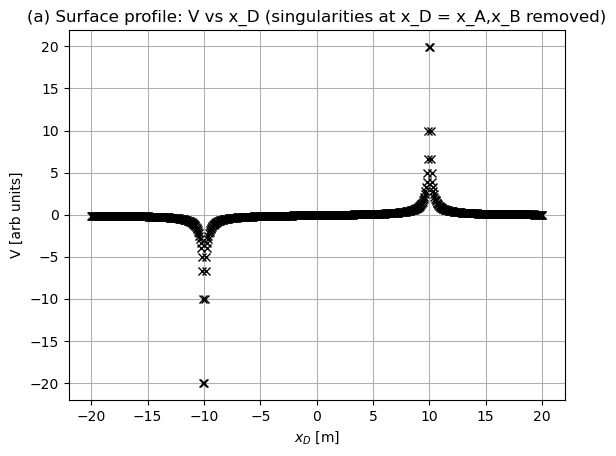

In [3]:
# Electrode positions
xA, zA = -10.0, 0.0
xB, zB =  10.0, 0.0

# --------------------- (a) surface-moving D ---------------------
xC = 2.0
xD = np.linspace(-20.0, 20.0, 801)  # dense sampling
# avoid exact singularities where xD==xA or xB (these give 1/0)
mask_valid = (np.abs(xD - xA) > 1e-9) & (np.abs(xD - xB) > 1e-9)

V = np.empty_like(xD)
V.fill(np.nan)
V[mask_valid] = (1.0/np.abs(xA - xC) - 1.0/np.abs(xC - xB)) - (1.0/np.abs(xA - xD[mask_valid]) - 1.0/np.abs(xD[mask_valid] - xB))

plt.figure()
plt.plot(xD[mask_valid], V[mask_valid], 'kx')
plt.xlabel(r'$x_D$ [m]')
plt.ylabel('V [arb units]')
plt.title('(a) Surface profile: V vs x_D (singularities at x_D = x_A,x_B removed)')
plt.grid()
plt.show()

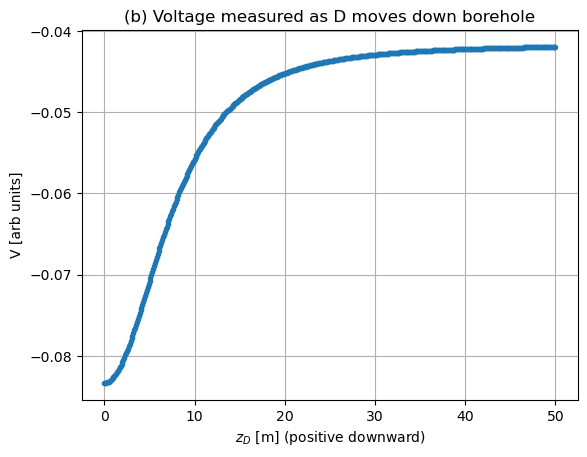

Sample V(z_D) values (first 8 depths):
 z_D =  0.000 m -> V = -8.333333e-02
 z_D =  0.100 m -> V = -8.332646e-02
 z_D =  0.200 m -> V = -8.330586e-02
 z_D =  0.300 m -> V = -8.327156e-02
 z_D =  0.400 m -> V = -8.322363e-02
 z_D =  0.500 m -> V = -8.316215e-02
 z_D =  0.600 m -> V = -8.308722e-02
 z_D =  0.700 m -> V = -8.299897e-02


In [8]:
# --------------------- (b) D moves into borehole (vary z_D) ---------------------
xC = 2.0
zC = 0.0
xD_fixed = -2.0
zD = np.linspace(0.0, 50.0, 501)  # depth from 0 (surface) down to 50 m

# compute distances r
def r(xe, ze, xc, zc):
    return np.sqrt((xe-xc)**2 + (ze-zc)**2)

rAC = r(xA, zA, xC, zC)
rCB = r(xC, zC, xB, zB)
rAD = r(xA, zA, xD_fixed, zD)
rDB = r(xD_fixed, zD, xB, zB)

V_downhole = (1.0/rAC - 1.0/rCB) - (1.0/rAD - 1.0/rDB)

plt.figure()
plt.plot(zD, V_downhole, marker='.', linestyle='none')
plt.xlabel(r'$z_D$ [m] (positive downward)')
plt.ylabel('V [arb units]')
plt.title('(b) Voltage measured as D moves down borehole')
plt.grid()
plt.show()

# Print a few sample values near shallow depth
print("Sample V(z_D) values (first 8 depths):")
for zi, vi in zip(zD[:8], V_downhole[:8]):
    print(f" z_D = {zi:6.3f} m -> V = {vi: .6e}")


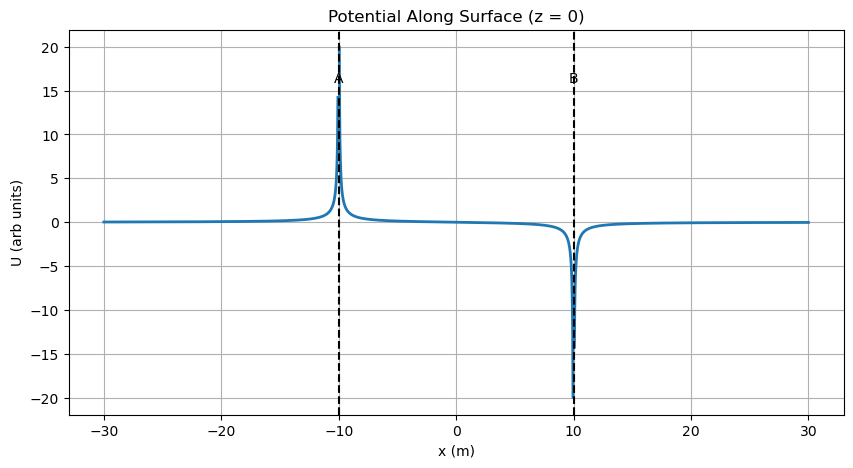

In [12]:
# --------------------- (c) u varying with a wandering c ---------------------
# electrode locations
xA, xB = -10.0, 10.0
zA = zB = 0.0

# surface line (z = 0)
xs = np.linspace(-30, 30, 2000)
zs = np.zeros_like(xs)

# compute distances
rA = np.sqrt((xs - xA)**2 + zs**2)
rB = np.sqrt((xs - xB)**2 + zs**2)

# compute potential
U = 1/rA - 1/rB

# mask singularities
U[(rA < 0.05) | (rB < 0.05)] = np.nan

plt.figure(figsize=(10,5))
plt.plot(xs, U, linewidth=2)

plt.axvline(xA, color='k', linestyle='--')
plt.axvline(xB, color='k', linestyle='--')
plt.text(xA, max(U)*0.8, "A", ha='center')
plt.text(xB, max(U)*0.8, "B", ha='center')

plt.xlabel("x (m)")
plt.ylabel("U (arb units)")
plt.title("Potential Along Surface (z = 0)")
plt.grid(True)
plt.show()


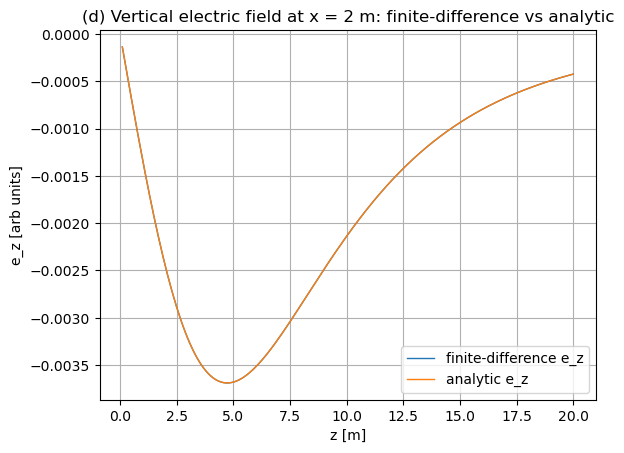

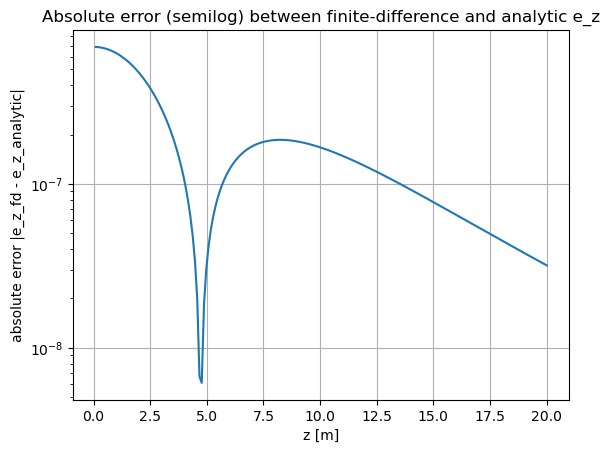

Max absolute error over z in range: 6.866e-07
Max relative error over z in range: 4.997e-03


In [6]:
# --------------------- (d) vertical electric field e_z via finite difference and analytic ---------------------
# Choose a single x to inspect vertical field (e.g., x = 2 m) and compare across depth
x_eval = 2.0
zs_eval = np.linspace(0.1, 20.0, 201)  # avoid exactly z=0 to stay away from singular behavior at surface directly above charges
dz = 1e-3  # small increment for finite difference

U_at_z = lambda x, z: (1.0/np.sqrt((x-xA)**2 + (z-zA)**2) - 1.0/np.sqrt((x-xB)**2 + (z-zB)**2))

U_z = U_at_z(x_eval, zs_eval)
U_z_plus = U_at_z(x_eval, zs_eval + dz)
e_z_fd = - (U_z_plus - U_z) / dz  # finite-difference approximation

# analytic derivative: ∂U/∂z = - (z - zA)/r_AC^3 + (z - zB)/r_CB^3
# with zA=zB=0 simplification
rAC_eval = np.sqrt((x_eval-xA)**2 + zs_eval**2)
rCB_eval = np.sqrt((x_eval-xB)**2 + zs_eval**2)
dU_dz_analytic = - (zs_eval - zA) / (rAC_eval**3) + (zs_eval - zB) / (rCB_eval**3)
e_z_analytic = - dU_dz_analytic  # e_z = -∂U/∂z

# compute error
abs_err = np.abs(e_z_fd - e_z_analytic)
rel_err = abs_err / (np.abs(e_z_analytic) + 1e-12)

plt.figure()
plt.plot(zs_eval, e_z_fd, label='finite-difference e_z', linewidth=1)
plt.plot(zs_eval, e_z_analytic, label='analytic e_z', linewidth=1)
plt.xlabel('z [m]')
plt.ylabel('e_z [arb units]')
plt.title("(d) Vertical electric field at x = 2 m: finite-difference vs analytic")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.semilogy(zs_eval, np.maximum(abs_err, 1e-20))
plt.xlabel('z [m]')
plt.ylabel('absolute error |e_z_fd - e_z_analytic|')
plt.title('Absolute error (semilog) between finite-difference and analytic e_z')
plt.grid()
plt.show()

print(f"Max absolute error over z in range: {np.nanmax(abs_err):.3e}")
print(f"Max relative error over z in range: {np.nanmax(rel_err):.3e}")
